In [7]:
#导入所需模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [8]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

In [15]:
#将features（数字图像特征值）使用reshape转换
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [16]:
#将features（数字图像特征值）标准化
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [17]:
#label（数字真是的值）以one-Hot Encoding进行转换
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [9]:
#多层感知加入DropOut功能以避免过度拟合
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = 'normal',
               activation = 'relu'))

In [12]:
model.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [13]:
#查看摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#开始训练
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',metrics = ['accuracy'])
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot,validation_split = 0.2,
                         epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2963 - acc: 0.9146 - val_loss: 0.1528 - val_acc: 0.9570
Epoch 2/10
 - 5s - loss: 0.1184 - acc: 0.9655 - val_loss: 0.1075 - val_acc: 0.9682
Epoch 3/10
 - 6s - loss: 0.0759 - acc: 0.9781 - val_loss: 0.0917 - val_acc: 0.9723
Epoch 4/10
 - 5s - loss: 0.0517 - acc: 0.9850 - val_loss: 0.0875 - val_acc: 0.9734
Epoch 5/10
 - 6s - loss: 0.0359 - acc: 0.9902 - val_loss: 0.0753 - val_acc: 0.9753
Epoch 6/10
 - 5s - loss: 0.0256 - acc: 0.9938 - val_loss: 0.0740 - val_acc: 0.9778
Epoch 7/10
 - 5s - loss: 0.0187 - acc: 0.9956 - val_loss: 0.0724 - val_acc: 0.9791
Epoch 8/10
 - 5s - loss: 0.0132 - acc: 0.9972 - val_loss: 0.0717 - val_acc: 0.9790
Epoch 9/10
 - 5s - loss: 0.0090 - acc: 0.9987 - val_loss: 0.0714 - val_acc: 0.9796
Epoch 10/10
 - 6s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.0715 - val_acc: 0.9799


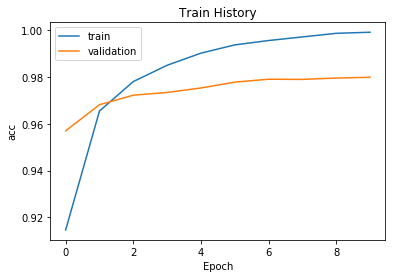

In [22]:
#画出准确率执行结果
#建立showt_rain_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

In [23]:
#查看预测准确率
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy = ',scores[1])

10000/10000 [==============================] - 1s 68us/step

accuracy =  0.9796
